                                   DM Assignment3

In [1]:
import os
import warnings 
warnings.filterwarnings("ignore")

import pandas as pd
grocery_data= pd.read_csv('Grocery_Items_64.csv').values
new=[]
for i in range(len(grocery_data)):
    new_list = [item for item in grocery_data[i] if not(pd.isnull(item)) == True]
    new.append(new_list)

In [2]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(new).transform(new)
final_df = pd.DataFrame(te_ary, columns=te.columns_)

final_df.head(3)

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,bags,baking powder,bathroom cleaner,beef,berries,beverages,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [3]:
from mlxtend.frequent_patterns import apriori,association_rules
def generte_rules(data,support,conf):
    items = apriori(data, min_support=support, use_colnames=True)
    ar=association_rules(items, metric="confidence", min_threshold=conf)
    return ar

In [4]:
generte_rules(final_df,0.01,0.1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(whole milk),0.121500,0.157375,0.015000,0.123457,0.784475,-0.004121,0.961305
1,(rolls/buns),(whole milk),0.108375,0.157375,0.015125,0.139562,0.886810,-0.001931,0.979297
2,(soda),(whole milk),0.093500,0.157375,0.011375,0.121658,0.773044,-0.003340,0.959336
3,(yogurt),(whole milk),0.090875,0.157375,0.011500,0.126547,0.804114,-0.002801,0.964706


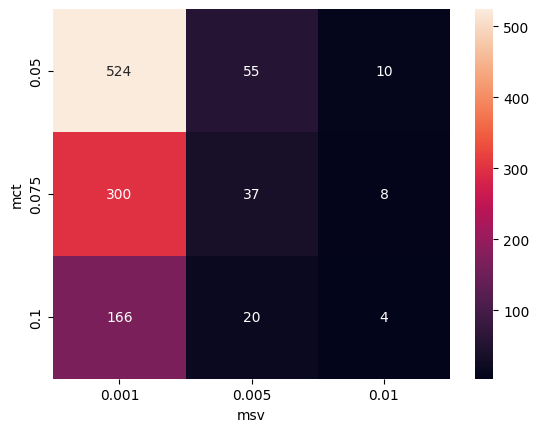

In [10]:
import seaborn as sns

def plot_sns(msv,mct):
    df = pd.DataFrame(columns=['msv', 'mct', 'count'])

    for s in msv:
        for c in mct:
            df = df.append({'msv': s, 'mct': c, 'count': len(generte_rules(final_df,s,c))}, ignore_index=True)
    he = df.pivot("mct", "msv", "count")
    sns.heatmap(he,annot=True,fmt=".0f")
msv =[0.001,0.005,0.01]
mct =[0.05,0.075,0.1]  
plot_sns(msv,mct)

In [11]:
subset1 = final_df.iloc[:len(final_df)//2]
subset2 = final_df.iloc[len(final_df)//2:]
generte_rules(subset1,0.005,0.075)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(beef),(whole milk),0.03700,0.15725,0.00550,0.148649,0.945301,-0.000318,0.989897
1,(bottled beer),(other vegetables),0.05025,0.11675,0.00525,0.104478,0.894883,-0.000617,0.986296
2,(bottled beer),(whole milk),0.05025,0.15725,0.00975,0.194030,1.233894,0.001848,1.045634
3,(bottled water),(other vegetables),0.06250,0.11675,0.00575,0.092000,0.788009,-0.001547,0.972742
4,(bottled water),(whole milk),0.06250,0.15725,0.00575,0.092000,0.585056,-0.004078,0.928139
5,(bottled water),(yogurt),0.06250,0.09675,0.00500,0.080000,0.826873,-0.001047,0.981793
6,(canned beer),(rolls/buns),0.04925,0.10650,0.00550,0.111675,1.048593,0.000255,1.005826
7,(canned beer),(whole milk),0.04925,0.15725,0.00650,0.131980,0.839299,-0.001245,0.970887
8,(citrus fruit),(whole milk),0.04875,0.15725,0.00625,0.128205,0.815295,-0.001416,0.966684
9,(curd),(whole milk),0.03425,0.15725,0.00525,0.153285,0.974783,-0.000136,0.995317


In [12]:
generte_rules(subset2,0.005,0.075)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bottled water),(other vegetables),0.05925,0.12625,0.00675,0.113924,0.902369,-0.000730,0.986089
1,(bottled water),(root vegetables),0.05925,0.06875,0.00500,0.084388,1.227465,0.000927,1.017079
2,(bottled water),(soda),0.05925,0.09575,0.00550,0.092827,0.969473,-0.000173,0.996778
3,(bottled water),(whole milk),0.05925,0.15750,0.00625,0.105485,0.669748,-0.003082,0.941851
4,(brown bread),(whole milk),0.03725,0.15750,0.00550,0.147651,0.937467,-0.000367,0.988445
5,(butter),(whole milk),0.03575,0.15750,0.00525,0.146853,0.932401,-0.000381,0.987520
6,(canned beer),(whole milk),0.04225,0.15750,0.00600,0.142012,0.901662,-0.000654,0.981948
7,(citrus fruit),(whole milk),0.04600,0.15750,0.00675,0.146739,0.931677,-0.000495,0.987389
8,(domestic eggs),(whole milk),0.03700,0.15750,0.00700,0.189189,1.201201,0.001173,1.039083
9,(frankfurter),(other vegetables),0.03700,0.12625,0.00500,0.135135,1.070377,0.000329,1.010273


In [13]:
pd.merge(generte_rules(subset1,0.005,0.075), generte_rules(subset2,0.005,0.075),on=['antecedents', 'consequents'])


,antecedents,consequents,antecedent support_x,consequent support_x,support_x,confidence_x,lift_x,leverage_x,conviction_x,antecedent support_y,consequent support_y,support_y,confidence_y,lift_y,leverage_y,conviction_y
0,(bottled water),(other vegetables),0.06250,0.11675,0.00575,0.092000,0.788009,-0.001547,0.972742,0.05925,0.12625,0.00675,0.113924,0.902369,-0.000730,0.986089
1,(bottled water),(whole milk),0.06250,0.15725,0.00575,0.092000,0.585056,-0.004078,0.928139,0.05925,0.15750,0.00625,0.105485,0.669748,-0.003082,0.941851
2,(canned beer),(whole milk),0.04925,0.15725,0.00650,0.131980,0.839299,-0.001245,0.970887,0.04225,0.15750,0.00600,0.142012,0.901662,-0.000654,0.981948
3,(citrus fruit),(whole milk),0.04875,0.15725,0.00625,0.128205,0.815295,-0.001416,0.966684,0.04600,0.15750,0.00675,0.146739,0.931677,-0.000495,0.987389
4,(domestic eggs),(whole milk),0.04100,0.15725,0.00525,0.128049,0.814301,-0.001197,0.966510,0.03700,0.15750,0.00700,0.189189,1.201201,0.001173,1.039083
5,(newspapers),(whole milk),0.03950,0.15725,0.00550,0.139241,0.885472,-0.000711,0.979077,0.03825,0.15750,0.00500,0.130719,0.829962,-0.001024,0.969192
6,(rolls/buns),(other vegetables),0.10650,0.11675,0.01200,0.112676,0.965105,-0.000434,0.995409,0.11025,0.12625,0.00900,0.081633,0.646595,-0.004919,0.951417
7,(sausage),(other vegetables),0.06100,0.11675,0.00550,0.090164,0.772282,-0.001622,0.970779,0.06850,0.12625,0.00825,0.120438,0.953964,-0.000398,0.993392
8,(soda),(other vegetables),0.09125,0.11675,0.00775,0.084932,0.727465,-0.002903,0.965228,0.09575,0.12625,0.01050,0.109661,0.868599,-0.001588,0.981367
9,(other vegetables),(whole milk),0.11675,0.15725,0.01400,0.119914,0.762571,-0.004359,0.957577,0.12625,0.15750,0.01600,0.126733,0.804652,-0.003884,0.964768


In [14]:
dir1 = 'cropped_images/n02085936-Maltese_dog/'
dir2 = 'cropped_images/n02092339-Weimaraner/'
dir3 = 'cropped_images/n02096294-Australian_terrier/'
dir4 = 'cropped_images/n02106550-Rottweiler/'

In [15]:
def plt_model_accuracy(history):
    tacc = history.history['accuracy']
    vacc = history.history['val_accuracy']
    epochs = range(1, len(tacc) + 1)
    plt.plot(epochs, tacc , label='Training-accuracy')
    plt.plot(epochs, vacc, label='Validation-accuracy')
    plt.title('accuracy curves')
    plt.xlabel('Number Of Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    
def get_imageslabels(directory):
    img = []
    breed=[]
    for name in os.listdir(directory):
        if name.endswith(".jpg") or name.endswith(".png"):
            imgs = load_img(os.path.join(directory, name), target_size=(128,128))
            img_array = img_to_array(imgs)
            img.append(img_array)
            if directory == dir1:
                breed.append(0)
            elif directory == dir2:
                breed.append(1)
            elif directory == dir3:
                breed.append(2)
            elif directory == dir4:
                breed.append(3)
    return img, breed


In [20]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.model_selection import train_test_split

images1, labels1 = get_imageslabels(dir1)
images2, labels2 = get_imageslabels(dir2)
images3, labels3 = get_imageslabels(dir3)
images4, labels4 = get_imageslabels(dir4)

img= np.concatenate([images1, images2, images3, images4], axis=0)
breed = np.concatenate([labels1, labels2, labels3, labels4], axis=0)

breed = to_categorical(breed)

X_train, X_val, y_train, y_val = train_test_split(img, breed, test_size=0.2, random_state=42)

X_train = X_train / 255.0
X_val = X_val / 255.0

## Banner ID : 916465568

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
warnings.filterwarnings("ignore", category=DeprecationWarning)
import matplotlib.pyplot as plt

def model(node):
    model = Sequential([
    Conv2D(8, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(node, activation='relu'),
    Dense(4, activation='softmax')
    ])

    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))
    plt_model_accuracy(history)

Train on 608 samples, validate on 152 samples
Epoch 1/10
608/608 [==============================] - 3s 6ms/sample - loss: 1.6127 - accuracy: 0.2615 - val_loss: 1.3853 - val_accuracy: 0.2632
Epoch 2/10
608/608 [==============================] - 3s 4ms/sample - loss: 1.3845 - accuracy: 0.2993 - val_loss: 1.3839 - val_accuracy: 0.3224
Epoch 3/10
608/608 [==============================] - 3s 4ms/sample - loss: 1.3829 - accuracy: 0.3339 - val_loss: 1.3826 - val_accuracy: 0.3224
Epoch 4/10
608/608 [==============================] - 3s 4ms/sample - loss: 1.3814 - accuracy: 0.3339 - val_loss: 1.3814 - val_accuracy: 0.3224
Epoch 5/10
608/608 [==============================] - 3s 4ms/sample - loss: 1.3801 - accuracy: 0.3339 - val_loss: 1.3800 - val_accuracy: 0.3224
Epoch 6/10
608/608 [==============================] - 3s 4ms/sample - loss: 1.3786 - accuracy: 0.3339 - val_loss: 1.3790 - val_accuracy: 0.3224
Epoch 7/10
608/608 [==============================] - 3s 4ms/sample - loss: 1.3774 - accur

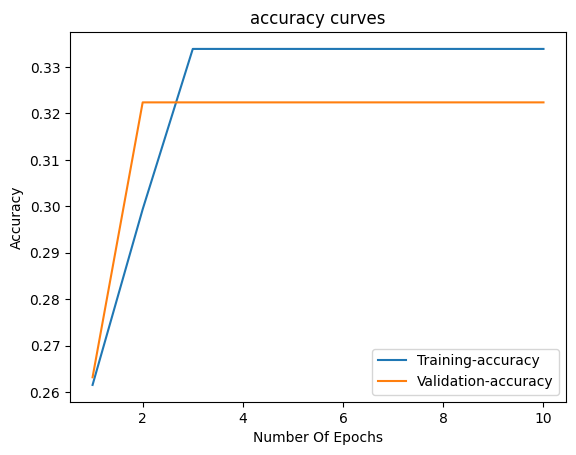

In [31]:
model(16)

Train on 608 samples, validate on 152 samples
Epoch 1/10
608/608 [==============================] - 3s 6ms/sample - loss: 2.3273 - accuracy: 0.2516 - val_loss: 1.3868 - val_accuracy: 0.2171
Epoch 2/10
608/608 [==============================] - 3s 4ms/sample - loss: 1.3867 - accuracy: 0.1957 - val_loss: 1.3861 - val_accuracy: 0.2171
Epoch 3/10
608/608 [==============================] - 3s 4ms/sample - loss: 1.3857 - accuracy: 0.2845 - val_loss: 1.3850 - val_accuracy: 0.3224
Epoch 4/10
608/608 [==============================] - 3s 4ms/sample - loss: 1.3844 - accuracy: 0.3339 - val_loss: 1.3839 - val_accuracy: 0.3224
Epoch 5/10
608/608 [==============================] - 3s 5ms/sample - loss: 1.3831 - accuracy: 0.3339 - val_loss: 1.3827 - val_accuracy: 0.3224
Epoch 6/10
608/608 [==============================] - 3s 4ms/sample - loss: 1.3818 - accuracy: 0.3339 - val_loss: 1.3816 - val_accuracy: 0.3224
Epoch 7/10
608/608 [==============================] - 3s 4ms/sample - loss: 1.3805 - accur

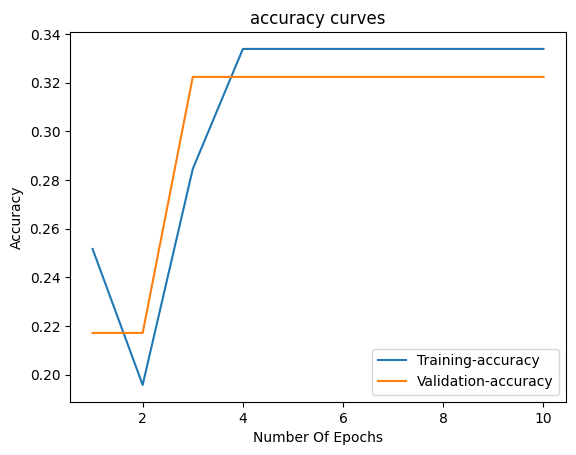

In [32]:
model(8)

Train on 608 samples, validate on 152 samples
Epoch 1/10
608/608 [==============================] - 3s 6ms/sample - loss: 1.0679 - accuracy: 0.5247 - val_loss: 0.8347 - val_accuracy: 0.6711
Epoch 2/10
608/608 [==============================] - 3s 5ms/sample - loss: 0.6337 - accuracy: 0.7599 - val_loss: 0.9123 - val_accuracy: 0.6118
Epoch 3/10
608/608 [==============================] - 3s 4ms/sample - loss: 0.4156 - accuracy: 0.8766 - val_loss: 0.6280 - val_accuracy: 0.7829
Epoch 4/10
608/608 [==============================] - 3s 5ms/sample - loss: 0.2778 - accuracy: 0.9359 - val_loss: 0.6201 - val_accuracy: 0.7697
Epoch 5/10
608/608 [==============================] - 3s 4ms/sample - loss: 0.1857 - accuracy: 0.9655 - val_loss: 0.6786 - val_accuracy: 0.7303
Epoch 6/10
608/608 [==============================] - 3s 5ms/sample - loss: 0.1387 - accuracy: 0.9852 - val_loss: 0.6273 - val_accuracy: 0.7237
Epoch 7/10
608/608 [==============================] - 3s 5ms/sample - loss: 0.0867 - accur

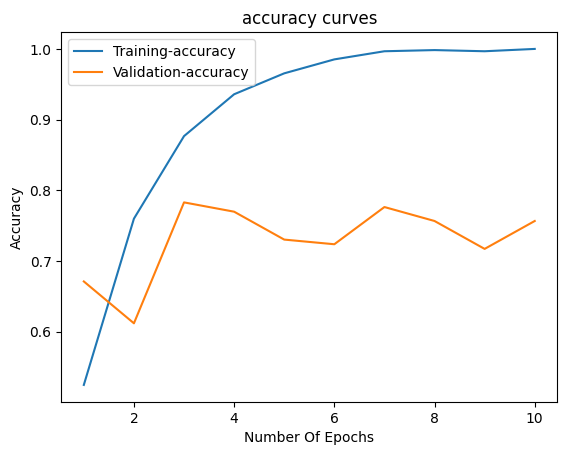

In [33]:
model(32)

### Models with batch sizes 8 and 16 exhibit underfitting, as they perform poorly on both training and validation datasets.
### The model with batch size 32 demonstrates overfitting, achieving perfect accuracy on the training data but significantly lower accuracy on the validation data.